In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

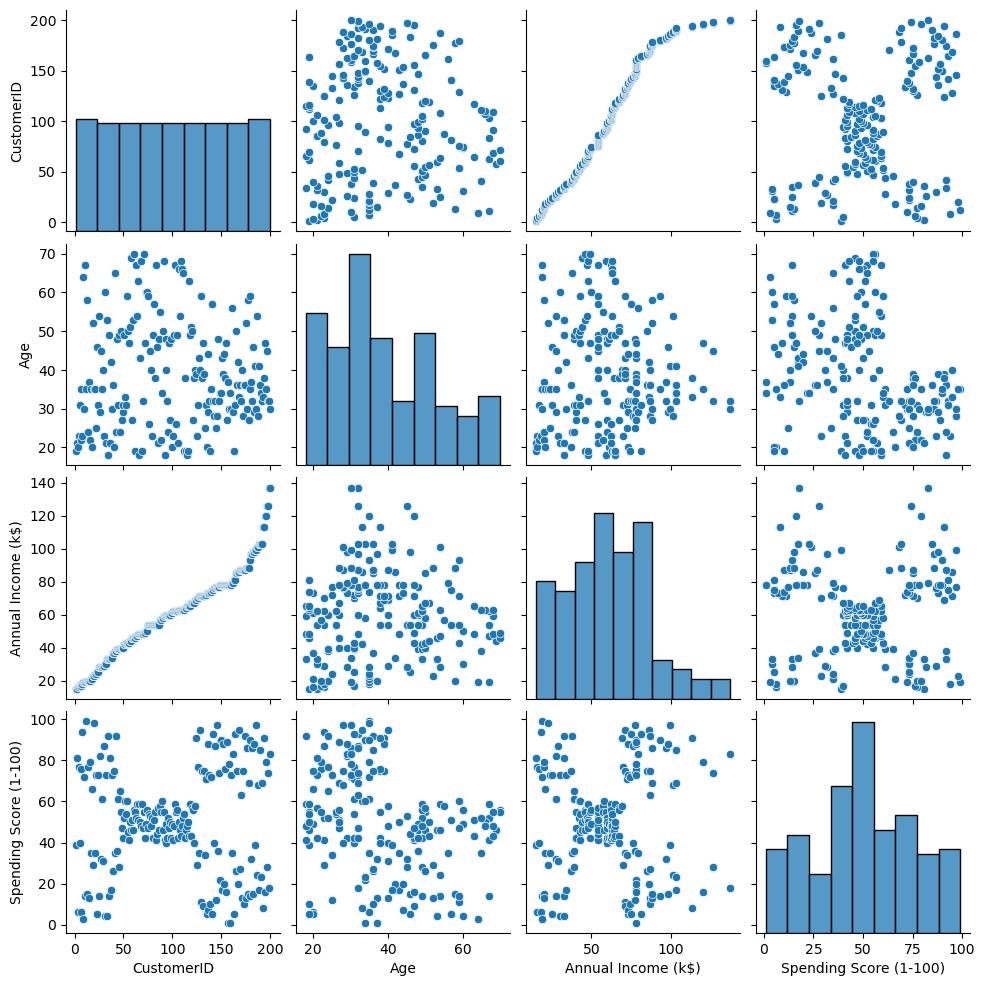

In [2]:
# Cargar el dataset
data = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/dataset/Mall_Customers.csv')

# Inspeccionar las primeras filas
print(data.head())

# Resumen estadístico
print(data.describe())

# Información general del dataset
print(data.info())

# Verificar valores nulos
print(data.isnull().sum())

# Visualizar la distribución de las variables relevantes
sns.pairplot(data)
plt.show()

In [3]:
# Eliminar columna irrelevante
data_clean = data.drop(columns=['CustomerID'])

# Selección de características relevantes
data_features = data_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Verificar los datos escalados
print(data_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


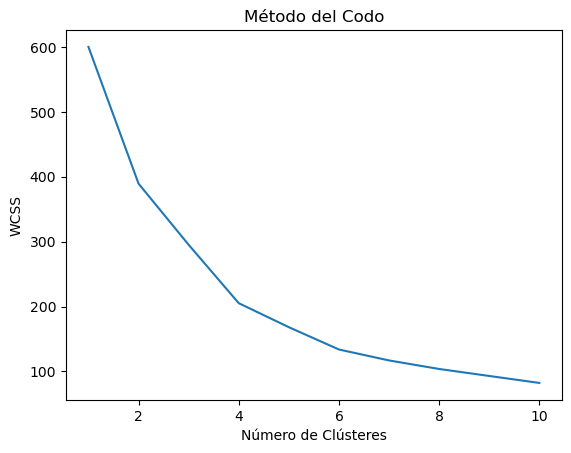

In [4]:
# Calcular WCSS para diferentes números de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


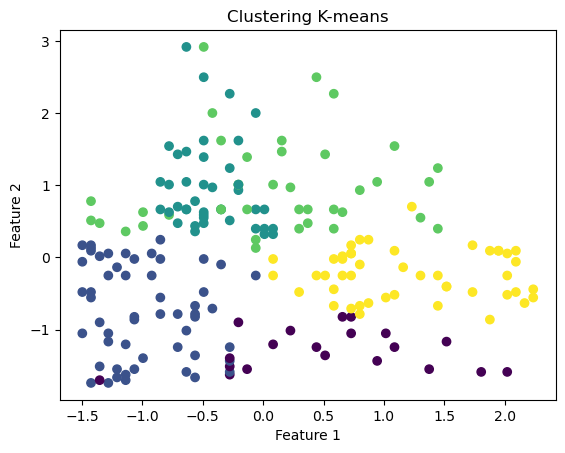

In [10]:
# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Añadir las etiquetas al dataset original
data_clean['Cluster_KMeans'] = kmeans_labels

# Visualización de los clústeres
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clustering K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

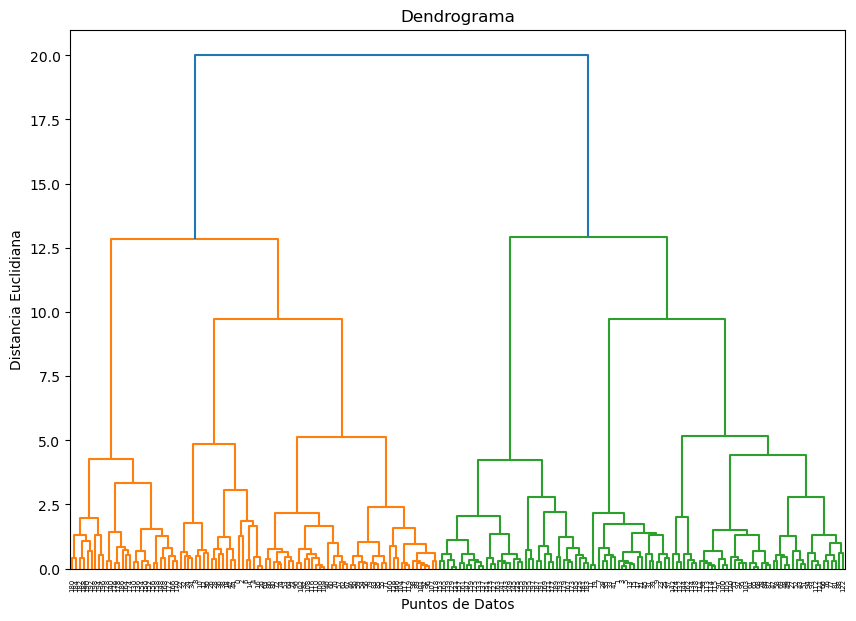

In [12]:
# Crear un dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

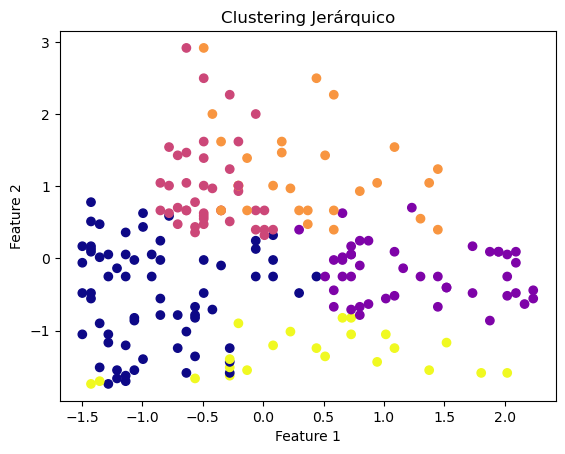

Coeficiente de Silhouette (K-means): 0.41664341513732767
Coeficiente de Silhouette (Hierarchical): 0.39002826186267214
Índice de Calinski-Harabasz (K-means): 125.10094020060954
Índice de Calinski-Harabasz (Hierarchical): 107.82656032570374


In [32]:
# Entrenar el modelo jerárquico
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Añadir las etiquetas al dataset original
data_clean['Cluster_Hierarchical'] = hierarchical_labels

# Visualización de los clústeres
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Clustering Jerárquico')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluación de K-means
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f'Coeficiente de Silhouette (K-means): {silhouette_kmeans}')

# Evaluación de Hierarchical Clustering
silhouette_hierarchical = silhouette_score(data_scaled, hierarchical_labels)
print(f'Coeficiente de Silhouette (Hierarchical): {silhouette_hierarchical}')

# Evaluación de K-means
calinski_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
print(f'Índice de Calinski-Harabasz (K-means): {calinski_kmeans}')

# Evaluación de Hierarchical Clustering
calinski_hierarchical = calinski_harabasz_score(data_scaled, hierarchical_labels)
print(f'Índice de Calinski-Harabasz (Hierarchical): {calinski_hierarchical}')